# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [32]:
data = "wb1_", "wb2_", "wb3_"
conditions = 'dmso', 'baf'
dfs_normalized = []
for condition in conditions:
    for wb in data:
        path = input_file_directory + "mefs/mefs_western_blot/"+wb+condition+".csv" #download
        df = pandas.read_csv(path, sep = ";")
        print(df)
        df = df.T #transpose
        df.columns = df.loc['proteins'] #select head of columns
        df.columns.name = None #remove name of index column
        df = df.drop(df.index[0:2])
        df = df.assign(flag_actin = df['flag']/ df['actin'],
                       p62_actin= df['p62']/ df['actin'],
                       lc3_actin= df['lc3']/ df['actin']) 
        df = df.iloc[:,4:] #select normalized columns
        df.reset_index(inplace = True)
        df = df[(df['index'] == 'MEF') | (df['index'] == 'EV') | 
                (df['index'] == 'WT1') | (df['index'] == 'dVSR1')] #select norm_ev_wt1_mut1
        df = df.replace({'index' : {'MEF':'MEF WT','EV':'ATG7-/-','WT1':'ATG7','dVSR1':'dVSR'}})
        dfs_normalized.append(df)

wbs_dmso = pandas.concat([dfs_normalized[0], dfs_normalized[1], dfs_normalized[2]], axis=0)
wbs_baf = pandas.concat([dfs_normalized[3], dfs_normalized[4], dfs_normalized[5]], axis=0)
wbs_dmso

   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     0    actin  20571418  28367832  27610004  33498246  31388518  35179539
1     0     flag   3713598   3713598  17355447  32148196  14710397  32205368
2     0      p62   7086841  16363640   9175518  24157539  13905589  19385832
3     0      lc3  41513794   4172518  54060856   4472518   4772518   4672518
   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     3    actin  26213296  25451832  19056154  23616832  17341640  20892933
1     3     flag   1227991   2165083  22842518  28240731  10444690  12747397
2     3      p62  10984882  26086125  12235347  21836196  15100518  11080811
3     3      lc3  31245924  17369811  25792146  14607631   2735376   1645607
   Blot proteins       MEF        EV       WT1     dVSR1       WT2     dVSR2
0     5    actin  38121146  38474024  43807803  50889246  43419660  54711217
1     5     flag   6168761   8564933  37940439  47406024  25009761  28518681

,index,flag_actin,p62_actin,lc3_actin
0,MEF WT,0.180522,0.344499,2.01803
1,ATG7-/-,0.130909,0.576838,0.147086
2,ATG7,0.628593,0.332326,1.95802
3,dVSR,0.959698,0.721158,0.133515
0,MEF WT,0.0468461,0.419058,1.19199
1,ATG7-/-,0.0850659,1.02492,0.682458
2,ATG7,1.1987,0.642068,1.35348
3,dVSR,1.19579,0.924603,0.618526
0,MEF WT,0.16182,0.359592,1.31444
1,ATG7-/-,0.222616,0.657405,0.467422


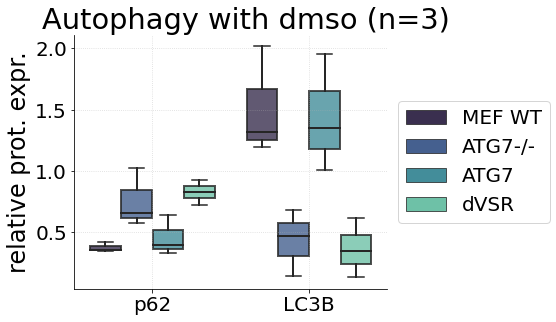

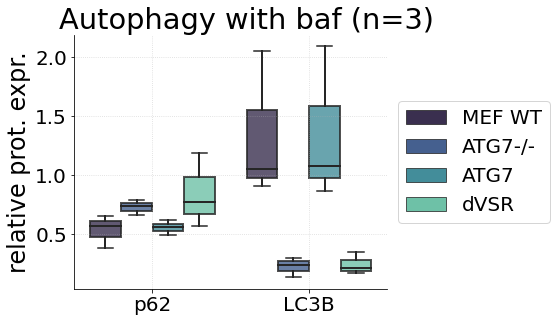

In [31]:
 ##Same without FLAG
# Distribution: Data preparation + graph
dfs = wbs_dmso, wbs_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]

    #data preparation for graph
    Data.reset_index(inplace = True, drop = True)
    shape = Data.shape
    shape = shape[0]
#     print(shape)

    #select the sample type column
    sample_type = {'sample_type':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    sample_typedf = pandas.DataFrame(sample_type)
    sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,
                                  sample_typedf,sample_typedf,sample_typedf])
    sample_typedf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(2,4)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'p62'
    data_distrib.loc[shape:,'x'] = 'LC3B'

    # Will be used for Hue
    data_distrib['Sample Type'] = sample_typedf['sample_type']

    #graph
    seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'mako',
                    data = data_distrib, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + ' (n=3)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

#     #save
    path = 'ATG7/MEF/Western_blot/'
    plt.savefig(output_file_directory+path+'ATG7_autophagy_'+Info+'.svg')

In [9]:
Data_stats

,index,flag_actin,p62_actin,lc3_actin
0,ATG7,0.829084,0.62078,2.09414
1,ATG7,1.00595,0.496623,0.866885
2,ATG7,1.01837,0.562074,1.08098
3,ATG7-/-,0.0302628,0.742239,0.13709
4,ATG7-/-,0.00671147,0.790144,0.302387
5,ATG7-/-,0.29883,0.661142,0.242765
6,MEF WT,0.00538322,0.575041,2.05429
7,MEF WT,0.0668049,0.653167,1.0537
8,MEF WT,0.190587,0.385498,0.909869
9,dVSR,1.0998,1.18669,0.215755


In [29]:
#Statistics
dfs = wbs_dmso, wbs_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]
    
    # Mann-Whitney analysis all compare to MEF WT
    Data_stats = Data.sort_values(['index'], ascending = True)
    Data_stats.reset_index(drop=True, inplace=True)
    control_label = Data_stats.loc[6]['index']
    print(Info.upper())
    
    ##p62
    control_p62 = Data_stats.iloc[6:9, 2:3]
    print('P62 STATS')
    ###ATG7-/-
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[3:6, 2:3], control_p62)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[3]['index'], "and", control_label,"is", Pvalue)
    ###ATG7
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 2:3], control_p62)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[0]['index'], "and", control_label,"is", Pvalue)
    ###dVSR
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 2:3], control_p62)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[9]['index'], "and", control_label,"is", Pvalue)

    ##lC3
    control_lc3 = Data_stats.iloc[6:9, 3:4]
    print('LC3 STATS')
    ###ATG7-/-
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[3:6, 3:4], control_lc3)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[3]['index'], "and", control_label,"is", Pvalue)
    ###ATG7
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 3:4], control_lc3)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[0]['index'], "and", control_label,"is", Pvalue)
    ###dVSR
    statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[9:, 3:4], control_lc3)
    Pvalue = "{:.5E}".format(pvalue)
    print("the pvalue between", Data_stats.loc[9]['index'], "and", control_label,"is", Pvalue)
    print()

DMSO
P62 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 4.04278E-02
LC3 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 4.04278E-02

BAF
P62 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 1.91367E-01
LC3 STATS
the pvalue between ATG7-/- and MEF WT is 4.04278E-02
the pvalue between ATG7 and MEF WT is 5.00000E-01
the pvalue between dVSR and MEF WT is 4.04278E-02



In [22]:
Data_stats.iloc[0:3, 3:4]

,lc3_actin
0,2.09414
1,0.866885
2,1.08098


In [23]:
control_lc3

,lc3_actin
6,2.05429
7,1.0537
8,0.909869


In [24]:
Data_stats.iloc[0:3, 2:3]

,p62_actin
0,0.62078
1,0.496623
2,0.562074


In [25]:
control_p62

,p62_actin
6,0.575041
7,0.653167
8,0.385498


In [27]:
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 3:4], control_lc3)
pvalue

0.5

In [26]:
statistic, pvalue = scipy.stats.mannwhitneyu(Data_stats.iloc[0:3, 2:3], control_p62)
pvalue

0.5

12
12


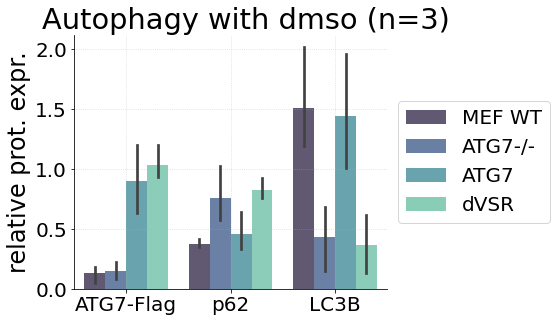

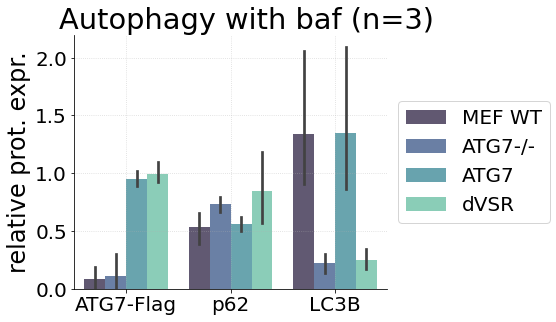

In [30]:
# Distribution: Data preparation + graph. BARPLOT
dfs = wbs_dmso, wbs_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]
    
    Data.reset_index(inplace = True, drop = True)
    shape = Data.shape
    shape = shape[0]
    print(shape)

    #select the sample type column
    sample_type = {'sample_type':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    sample_typedf = pandas.DataFrame(sample_type)
    sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,
                                  sample_typedf,sample_typedf,sample_typedf])
    sample_typedf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,4)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'ATG7-Flag'
    data_distrib.loc[shape: shape*2,'x'] = 'p62'
    data_distrib.loc[shape*2:,'x'] = 'LC3B'

    # Will be used for Hue
    data_distrib['Sample Type'] = sample_typedf['sample_type']

    #graph
    seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="bar",
                    palette= 'mako', alpha = 0.8, data = data_distrib, legend=False)
    plt.grid(alpha = 0.5, ls=':')
    plt.tight_layout()
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + " (n=3)", x=.55)

    # #save
    # path = 'ATG7/figs_ATG7_characterisation/'
    # plt.savefig(output_file_directory+path+'ATG7_exp_alltissue.svg')
